In [ ]:
def square(x):
    return x*x

class Student:
    age = 10
    name = "Tolu"
    grade = "B"

    def greet(self):
        # print("My grade is {}".format(self.grade))
        print(f"My name is {self.name}; I am {self.age} years old")

    def get_age_name(self):
        return self.name, self.age

student1 = Student()
student1.greet()
# student = Student()
name, age, year = student1.get_age_name()
print(name)

My name is Tolu; I am 10 years old


ValueError: not enough values to unpack (expected 3, got 2)

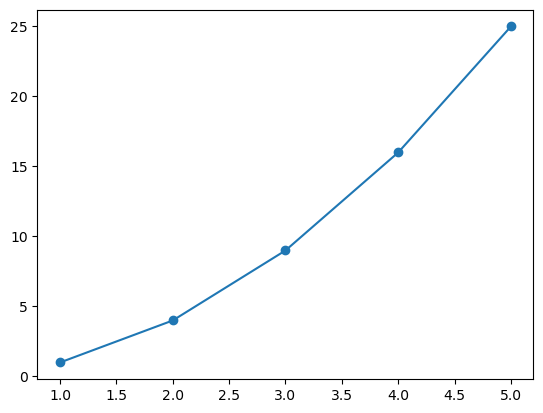

In [33]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [item*item for item in x]
plt.plot(x, y, '-o')

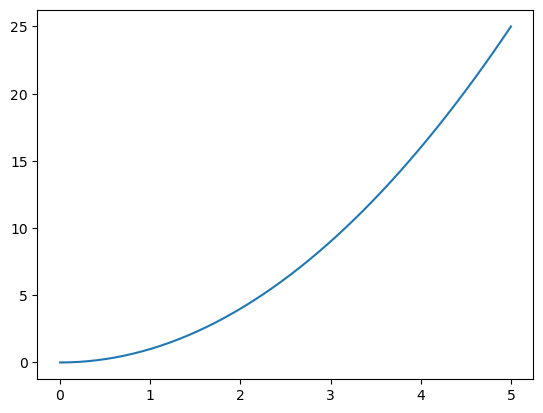

In [ ]:
import numpy as np
x_values = np.linspace(0, 5, 50)
y_values = x_values * x_values
plt.plot(x_values, y_values)

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/naijacoderorg/lectures/main/lectures2024/datascience/migrations.csv'
df = pd.read_csv(url)


In [50]:
df2 = pd.read_csv('migrations.csv')
# df2.head(10)
by_continent = df2.groupby('origin_continent')


- read dataframe from 'https://raw.githubusercontent.com/naijacoderorg/lectures/main/lectures2024/datascience/migrations.csv'

- Find the total migration from Nigeria to all Ethiopia in 1970.

- Find the total migration from Ghana to all countries in 1980.
